In [1]:
from stpy.continuous_processes.gauss_procc import GaussianProcess
from stpy.continuous_processes.fourier_fea import GaussianProcessFF
from stpy.continuous_processes.kernelized_features import KernelizedFeatures
from stpy.kernels import KernelFunction
from stpy.embeddings.embedding import HermiteEmbedding,RFFEmbedding 
import stpy
import torch
import matplotlib.pyplot as plt
import numpy as np

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [2]:
n = 1024
N = 512
gamma = 0.1
s = 0.01
#benchmark = stpy.test_functions.benchmarks.GaussianProcessSample(d =1, gamma = gamma, sigma = s, n = n)
benchmark = stpy.test_functions.benchmarks.Simple1DFunction(d =1, sigma = s)

x = benchmark.initial_guess(N, adv_inv = True)
y = benchmark.eval(x)
xtest = benchmark.interval(1024)

/home/mojko/Documents/PhD_Projects/stpy/stpy/random_process.py:73: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r+" (-> marker='+'). The keyword argument will take precedence.
  plt.plot(self.x.detach().numpy(), self.y.detach().numpy(), 'r+', ms=10, marker="o")
/home/mojko/Documents/PhD_Projects/stpy/stpy/random_process.py:73: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r+" (-> marker='+'). The keyword argument will take precedence.
  plt.plot(self.x.detach().numpy(), self.y.detach().numpy(), 'r+', ms=10, marker="o")
/home/mojko/Documents/PhD_Projects/stpy/stpy/random_process.py:73: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r+" (-> marker='+'). The keyword argument will take precedence.
  plt.plot(self.x.detach().numpy(), self.y.detach().numpy(), 'r+', ms=10, marker="o")
/home/mojko/Documents/PhD_Projects/stpy/stpy/random_process.p

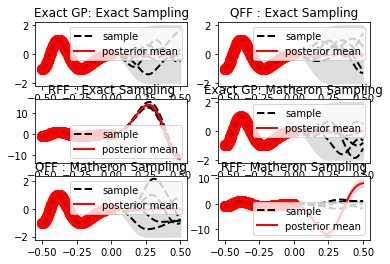

In [3]:
GP = GaussianProcess(gamma = gamma, s = s)
GP.fit_gp(x,y)
plt.subplot(3,2,1)
plt.title("Exact GP: Exact Sampling")
GP.visualize(xtest, fig = False, show = False, size = 5)



m = 64

kernel = KernelFunction(gamma = gamma)
embedding = HermiteEmbedding(gamma = gamma, m = m)
RFF = KernelizedFeatures(embedding=embedding, s = s, m = m)
RFF.fit_gp(x,y) 
plt.subplot(3,2,2)
plt.title("QFF : Exact Sampling")
RFF.visualize(xtest, fig = False, show = False, size = 5)




m = 64
kernel = KernelFunction(gamma = gamma)
embedding = RFFEmbedding(gamma = gamma, m = m)
RFF = KernelizedFeatures(embedding=embedding, s = s, m = m)
RFF.fit_gp(x,y) 

plt.subplot(3,2,3)
plt.title("RFF : Exact Sampling")
RFF.visualize(xtest, fig = False, show = False, size = 5)


GP = GaussianProcess(gamma = gamma, s = s)
GP.fit_gp(x,y)
plt.subplot(3,2,4)
plt.title("Exact GP: Matheron Sampling")
GP.visualize(xtest, fig = False, show = False, size = 5)


kernel = KernelFunction(gamma = gamma)
embedding = HermiteEmbedding(gamma = gamma, m = m)
RFF = KernelizedFeatures(embedding=embedding, s = s, m = m)
RFF.fit_gp(x,y) 
plt.subplot(3,2,5)
plt.title("QFF : Matheron Sampling")
RFF.visualize(xtest,fig = False, show = False, size = 5, matheron_kernel = kernel)




m = 64
kernel = KernelFunction(gamma = gamma)
embedding = RFFEmbedding(gamma = gamma, m = m)
RFF = KernelizedFeatures(embedding=embedding, s = s, m = m)
RFF.fit_gp(x,y) 

plt.subplot(3,2,6)
plt.title("RFF: Matheron Sampling")
RFF.visualize(xtest, fig = False, show = False, size = 5, matheron_kernel = kernel)



In [6]:
Z = torch.inverse(GP.K)
Z

tensor([[ 9.8240e+03, -2.0794e+00, -2.3389e+01,  ...,  1.9110e+01,
          1.1837e+01,  1.7984e+01],
        [-2.0794e+00,  9.8127e+03,  6.6755e+00,  ...,  2.3826e+01,
         -1.2713e+02,  2.2567e+01],
        [-2.3389e+01,  6.6755e+00,  9.7724e+03,  ..., -3.7720e+00,
          2.7127e+00, -4.2379e+00],
        ...,
        [ 1.9110e+01,  2.3826e+01, -3.7720e+00,  ...,  9.8589e+03,
          1.9133e+01, -1.4119e+02],
        [ 1.1837e+01, -1.2713e+02,  2.7127e+00,  ...,  1.9133e+01,
          9.8283e+03,  2.0128e+01],
        [ 1.7984e+01,  2.2567e+01, -4.2379e+00,  ..., -1.4119e+02,
          2.0128e+01,  9.8586e+03]], dtype=torch.float64)